In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [13]:
import os 
#os.getcwd()
os.chdir("C:\\Users\\ADMIN\\OneDrive - Rigorous Statistics\\clients work_Desktop\\Ergotech\\Didi")

In [14]:
data = pd.read_excel('data.xlsx')

In [15]:
data.head()

,Gender,H1,H2,H5,H6,C1
0,F,200.0,125.0,73.0,100.0,571.0
1,F,179.0,135.0,41.0,111.0,522.0
2,F,185.0,130.0,56.0,126.0,562.0
3,F,183.0,136.0,45.0,95.0,531.0
4,F,191.0,126.0,93.0,124.0,559.0


In [19]:
data=data.dropna()
# convert categorical variables to numeric using pandas' factorize() method
data['Gender'] = pd.factorize(data['Gender'])[0]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15788\2241761295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = pd.factorize(data['Gender'])[0]


In [20]:
round(data.describe(),2)

,Gender,H1,H2,H5,H6,C1
count,8543.00,8543.00,8543.00,8543.00,8543.00,8543.00
mean,0.58,196.81,145.76,88.50,127.19,564.06
std,0.49,8.89,10.75,20.33,16.77,19.68
min,0.00,15.00,106.00,29.00,60.00,452.00
25%,0.00,191.00,140.00,75.00,120.00,551.00
50%,1.00,197.00,146.00,86.00,127.00,564.00
75%,1.00,202.00,152.00,100.00,135.00,576.00
max,1.00,299.00,595.00,246.00,1141.00,689.00


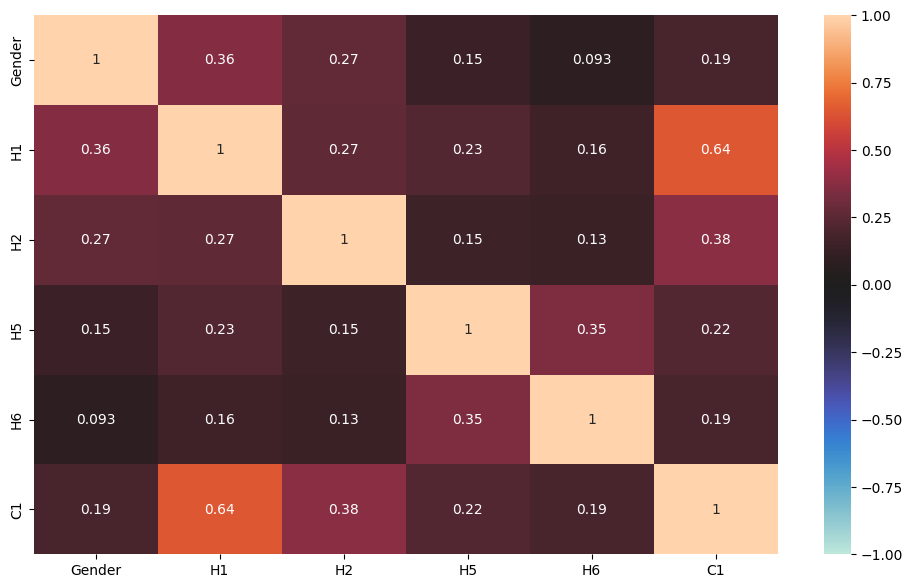

In [21]:
plt.figure(figsize=(12,7))
corr = data.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

In [22]:
scaler = StandardScaler()
# scaler = Normalizer()
data_scaled = scaler.fit_transform(data)

In [23]:
pca = PCA(2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

In [24]:
projection = pd.DataFrame(columns=['x','y'], data=data_pca)
projection

,x,y
0,-1.523603,-1.002787
1,-3.993731,-0.627588
2,-2.279649,-0.047300
3,-3.700968,-1.370005
4,-1.578380,0.882506
...,...,...
8538,1.596241,-0.277404
8539,2.524601,0.237214
8540,-0.107048,0.303323
8541,0.732727,0.360294


In [32]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(projection)

projection['cluster_pca'] = kmeans.predict(projection)

In [33]:
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

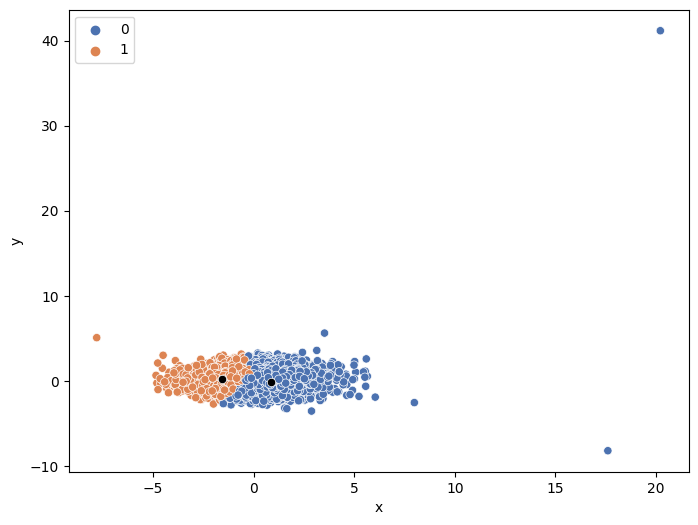

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=projection, x='x', y='y', hue='cluster_pca', palette="deep");
sns.scatterplot(x=centroids_x, y=centroids_y, marker='o', c=['black']);

In [35]:
for n_clusters in range(2, 8):
    clusterer = KMeans(n_clusters=n_clusters,random_state=42)
    preds = clusterer.fit_predict(projection[['x', 'y']])
    centers = clusterer.cluster_centers_

    score = metrics.silhouette_score(projection[['x', 'y']], preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39772614607528617)
For n_clusters = 3, silhouette score is 0.3545097629809525)
For n_clusters = 4, silhouette score is 0.34758824228846597)
For n_clusters = 5, silhouette score is 0.3462786877924543)
For n_clusters = 6, silhouette score is 0.3321893020741568)
For n_clusters = 7, silhouette score is 0.3230795092488036)


In [36]:
pca.explained_variance_ratio_.sum()

0.5734743313179113

In [37]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation, MeanShift, OPTICS, SpectralBiclustering, MiniBatchKMeans


# Separate features and labels
X = data.drop("Gender", axis=1)
y = data["Gender"]

# Define clustering models
kmeans = KMeans(n_clusters=2, random_state=42)
agglo = AgglomerativeClustering(n_clusters=2)
dbscan = DBSCAN(eps=3, min_samples=2)
spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
birch = Birch(n_clusters=2)
gaussian = GaussianMixture(n_components=2, covariance_type='full')
affinity_prop = AffinityPropagation(damping=0.5, max_iter=200, affinity='euclidean')
mean_shift = MeanShift(bandwidth=2)
optics = OPTICS(min_samples=2)
spectral_bi = SpectralBiclustering(n_clusters=2)
mini_batch = MiniBatchKMeans(n_clusters=2)

# Fit models to data
kmeans.fit(X)
agglo.fit(X)
dbscan.fit(X)
spectral.fit(X)
birch.fit(X)
gaussian.fit(X)
affinity_prop.fit(X)
mean_shift.fit(X)
optics.fit(X)
spectral_bi.fit(X)
mini_batch.fit(X)

# Evaluate models
labels = [kmeans.labels_, agglo.labels_, dbscan.labels_, spectral.labels_, birch.predict(X), 
          gaussian.predict(X), affinity_prop.labels_, mean_shift.labels_, optics.labels_, 
          spectral_bi.row_labels_, mini_batch.labels_]
names = ["K-Means", "Agglomerative Clustering", "DBSCAN", "Spectral Clustering", "Birch", 
         "Gaussian Mixture", "Affinity Propagation", "Mean Shift", "OPTICS", "Spectral Biclustering", "Mini Batch K-Means"]
scores = []
for i in range(len(labels)):
    score = metrics.silhouette_score(X, labels[i])
    scores.append(score)

# Select best model
best_model_index = scores.index(max(scores))
best_model_name = names[best_model_index]
best_model_labels = labels[best_model_index]

print("Best model is:", best_model_name)
print("Labels:", best_model_labels)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


Best model is: Gaussian Mixture
Labels: [1 1 1 ... 1 1 1]
